<a href="https://colab.research.google.com/github/DiliSimon/generative-snowboard/blob/master/KP_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pickle
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
with open("keypoint_sequences.pkl", "rb") as infile:
  keypoint_sequences = pickle.load(infile)
with open("target_predictions.pkl", "rb") as infile:
  target_predictions = pickle.load(infile)
with open("keypoint_sequences_val.pkl", "rb") as infile:
  keypoint_sequences_val = pickle.load(infile)
with open("target_predictions_val.pkl", "rb") as infile:
  target_predictions_val = pickle.load(infile)


In [12]:
def create_model():
  model = keras.Sequential()
  model.add(keras.Input(shape=(None, 50), dtype="float32")) # unknown number of time steps to look into the past, 50 features (25 keypoint ordered pairs)
  model.add(keras.layers.LSTM(64, return_sequences=True))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.LSTM(64))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(64, activation="sigmoid"))
  model.add(keras.layers.Dense(50, activation="sigmoid")) # output 50 features (25 keypoint ordered pairs)

  model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=3e-3, momentum=0.2, nesterov=False),
    loss=keras.losses.MeanSquaredError(),
    metrics=[],
  )

  return model

In [17]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training_2/cp-{epoch:04d}.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)


# Create a callback that saves the model's weights every 5 epochs
cp_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

# Create a new model instance
model = create_model()

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# # Train the model with the new callback
# model.fit(train_images,
#           train_labels,
#           epochs=50,
#           batch_size=batch_size,
#           callbacks=[cp_callback],
#           validation_data=(test_images, test_labels),
#           verbose=0)

In [ ]:
history = model.fit(x=keypoint_sequences, y=target_predictions, epochs=1000, callbacks=[cp_callback])
loss_values = history.history["loss"]

model.save_weights("kp_rnn.weights.h5")

Epoch 1/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.1271
Epoch 2/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1275
Epoch 3/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1263
Epoch 4/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1262
Epoch 5/1000
15/21 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1259
Epoch 5: saving model to training_2/cp-0005.weights.h5
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1257
Epoch 6/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1249
Epoch 7/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1234
Epoch 8/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1237
Epoch 9/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1234
Epoch 10/1000
 9/21 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1219
Epoch 10: saving model to training_2/cp-0010.weights.h5
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1223
Epoch 11/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1218
Epoch 12/1000
21/21 ━━━━━━━━━

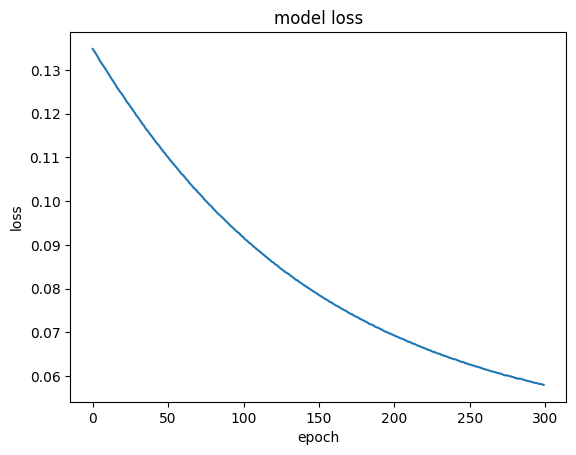

In [10]:
plt.plot(loss_values)
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.savefig("loss_graph.png")